In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import datasets 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier 

from sklearn.cluster import KMeans
import sklearn.cluster as cluster

from sklearn.preprocessing import normalize, StandardScaler 

In [54]:
data = pd.read_csv("./listings.csv") 
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,18666,Flat with Sunny Terrace,71615,Mireia And Maria,Sant Martí,el Camp de l'Arpa del Clot,41.40889,2.18555,Entire home/apt,130,3,1,2015-10-10,0.02,30,304
1,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia And Maria,Eixample,la Sagrada Família,41.40420,2.17306,Entire home/apt,60,1,20,2019-10-19,0.25,30,312
2,23197,FORUM DELUXE 5 MINS WALK CCIB CENTER & SEA!,90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.41203,2.22114,Entire home/apt,210,3,51,2019-09-29,0.48,2,359
3,25786,NICE ROOM AVAILABLE IN THE HEART OF GRACIA,108310,Pedro,Gràcia,la Vila de Gràcia,41.40145,2.15645,Private room,32,1,268,2019-11-06,2.38,1,46
4,31958,"Gaudi Attic 1, Friendly Rentals",136853,Fidelio,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.40950,2.15938,Entire home/apt,60,1,182,2019-10-16,1.71,39,324


## 1) Classifiers

### Exploration and Preparation of data.

1) We want to make a Naive Bayes Classifier that allow us to tell the neighbour where an apartment could be based on its latitude and longitude coordinates, to assign them to some apartments were the owner forget to upload it.

Let's explore the data first, by exploring the different points based on longitude and latitude.

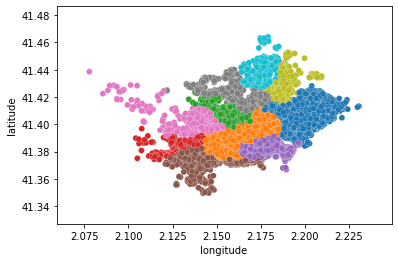

In [38]:
sns.scatterplot(x="longitude", y="latitude", hue="neighbourhood_group", data=data, legend=None, linewidth=0.2)

In [4]:
# X -> features, y -> label 

features = pd.DataFrame()
features['latitude']  = data.latitude
features['longitude'] = data.longitude

neighbour = data.neighbourhood_group

features.head()

,latitude,longitude
0,41.40889,2.18555
1,41.40420,2.17306
2,41.41203,2.22114
3,41.40145,2.15645
4,41.40950,2.15938


In [5]:
# Now let's divide our data into train and test, for later assessment.

#To test if its working just train it with 1000 apartments randomly chosen within the whole file, 
#and test it for another different 1000.

X_train, X_test, y_train, y_test = train_test_split(features, neighbour, random_state = 0, test_size=1000, train_size=1000) 

### Gaussian Naive Bayes Classifier

In [6]:
# And let's do the classifier.
naivebayes = GaussianNB().fit(X_train, y_train) 
prediction = naivebayes.predict(X_test) 

Now that is trained, let's check the accuracy, and perform a confusion matrix to see how it classified the data.

In [7]:
# Which is the accuracy of your predictions?

accuracy = naivebayes.score(X_test, y_test) 
print ("The model has an accuracy of:",accuracy) 

The model has an accuracy of: 0.858


In [8]:
# creating a confusion matrix 
cm = confusion_matrix(y_test, prediction)
print ("The confusion matrix is the next one:\n")
print (cm)

The confusion matrix is the next one:

[[203  18   0   0   0   0   0   0   0   0]
 [  6 292   0   0   0   0   0   2  27   0]
 [  0  31  50   6   0   0   0   0   0   2]
 [  0   4   4  27   0   0   0   0   0   0]
 [  0   0   0   0  22   0   0   0   0   1]
 [  0   0   0   1   0  12   2   0   0   0]
 [  0   0   0   1   0   0  16   3   0   0]
 [  0   6   0   2   0   0   0  92   0   0]
 [  0   4   0   0   8   0   0   0 123   0]
 [  0   6   8   0   0   0   0   0   0  21]]


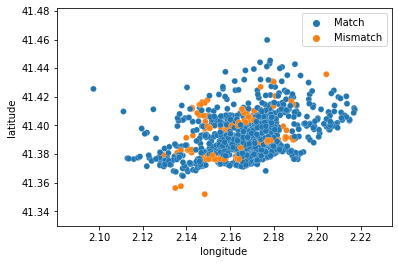

In [72]:
match = list()

for index in range(0, 1000):
    if (list(y_test)[index]) == list(prediction)[index]:
        match.append("Match")
    else:
        match.append("Mismatch")
    
sns.scatterplot(x="longitude", y="latitude", hue=match, data=X_test, linewidth=0.2)

### K-Nearest Neighbours Classifier

In [9]:
# Now we want to use another method for classification, so let's use KNN

knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train) 
  
# accuracy on X_test 
accuracy_knn = knn.score(X_test, y_test) 

print ("The accuracy for KNN is:",accuracy_knn)

The accuracy for KNN is: 0.939


In [10]:
knn_predictions = knn.predict(X_test)  
cm = confusion_matrix(y_test, knn_predictions) 
print ("And the confusion matrix for KNN is this one:\n")
print (cm)

And the confusion matrix for KNN is this one:

[[213   8   0   0   0   0   0   0   0   0]
 [  4 306   3   0   0   0   0   0   8   6]
 [  0   2  85   0   0   0   0   0   0   2]
 [  0   1   1  31   0   0   0   2   0   0]
 [  0   3   0   0  19   0   0   0   1   0]
 [  0   0   0   1   0  12   2   0   0   0]
 [  0   0   0   1   0   1  14   4   0   0]
 [  0   0   0   0   0   0   0 100   0   0]
 [  1   3   0   0   1   0   0   0 130   0]
 [  0   0   6   0   0   0   0   0   0  29]]


Here we can see that for classification with two features, and n=1000, K-Nearest Neighbours with N=7, is performing better than a Naive Bayes Algorithm.

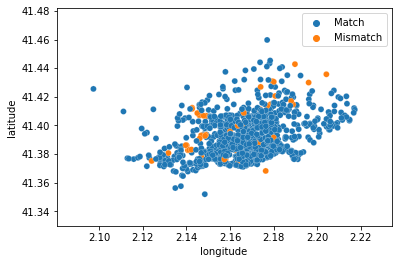

In [74]:
match_knn = list()

for index in range(0, 1000):
    if (list(y_test)[index]) == list(knn_predictions)[index]:
        match_knn.append("Match")
    else:
        match_knn.append("Mismatch")
    
sns.scatterplot(x="longitude", y="latitude", hue=match_knn, data=X_test, linewidth=0.2)

Let's compare both methods of Classification by showing both plots next to each other.

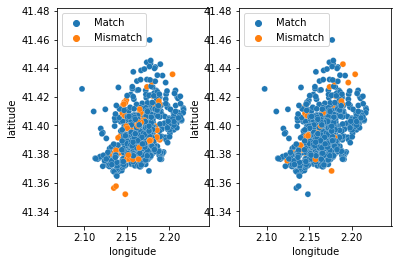

In [75]:
fig, (ax1, ax2) = plt.subplots(1,2)
sns.scatterplot(x="longitude", y="latitude", hue=match, data=X_test, linewidth=0.2, ax=ax1)
sns.scatterplot(x="longitude", y="latitude", hue=match_knn, data=X_test, linewidth=0.2, ax=ax2)
plt.show()

As we can see, the KNN methods performs better than the Gaussian Naive Bayes Classificator.

## 2) Clustering

2) We want to clusterize the apartments according to their prize and room type (1: shared room, 2: private room, 3: hotel room, 4: entire apartment). Plotting different amount of clusters according to this and other features (neighbourhood, availability, minimum nights) can we draw any conclusions?

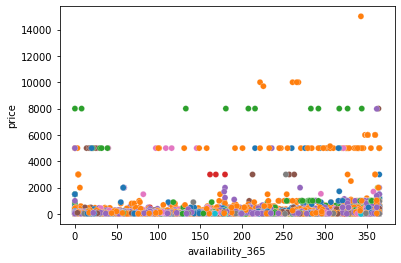

In [11]:
#For doing this, first we need to see how the data distributes according to these variables

sns.scatterplot(x="availability_365", y="price", hue="neighbourhood_group", data=data, legend=False, linewidth=0.2)

In [58]:
features_class = pd.DataFrame()
features_class['availability_365']  = data.availability_365
features_class['price'] = data.price
features_class['neighbourhood_group'] = data.neighbourhood_group


features_class['minimum_nights'] = data.minimum_nights

#Let's convert the categorical neighbourhoods to numeric

features_class.neighbourhood_group = pd.Categorical(features_class.neighbourhood_group)
features_class['neighbourhood_group'] = features_class.neighbourhood_group.cat.codes

# And the same for room type.
features_class['room_type'] = data.room_type
features_class.room_type = pd.Categorical(features_class.room_type)
features_class['room_type'] = features_class.room_type.cat.codes


#From this we can extract:
data['room_type'].unique()


#Room Type
# 0: Entire home/apt
# 1: Hotel Room
# 2: Private room
# 3: Shared room

#Neighbourhood_group
# 0: Ciutat Vella
# 1: Eixample
# 2: Gracia
# 3: Horta Guinardó
# 4: Les Corts
# 5: Nou Barris
# 6: Sant Andreu
# 7: Sant Martí
# 8: Sants Montjuic
# 9: Sarrià-Sant Gervasi

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [42]:
# Once we have the dataset, we will normalize the variables.

scaler = StandardScaler() 
X_scaled = scaler.fit_transform(features_class) 
  
# Normalizing the data so that the data 
# approximately follows a Gaussian distribution 
X_normalized = normalize(X_scaled) 

### K-Means Algorithm

In [43]:
kmeans = KMeans(n_clusters=7)
kmeans.fit(X_normalized)
features_class['Cluster'] = kmeans.labels_

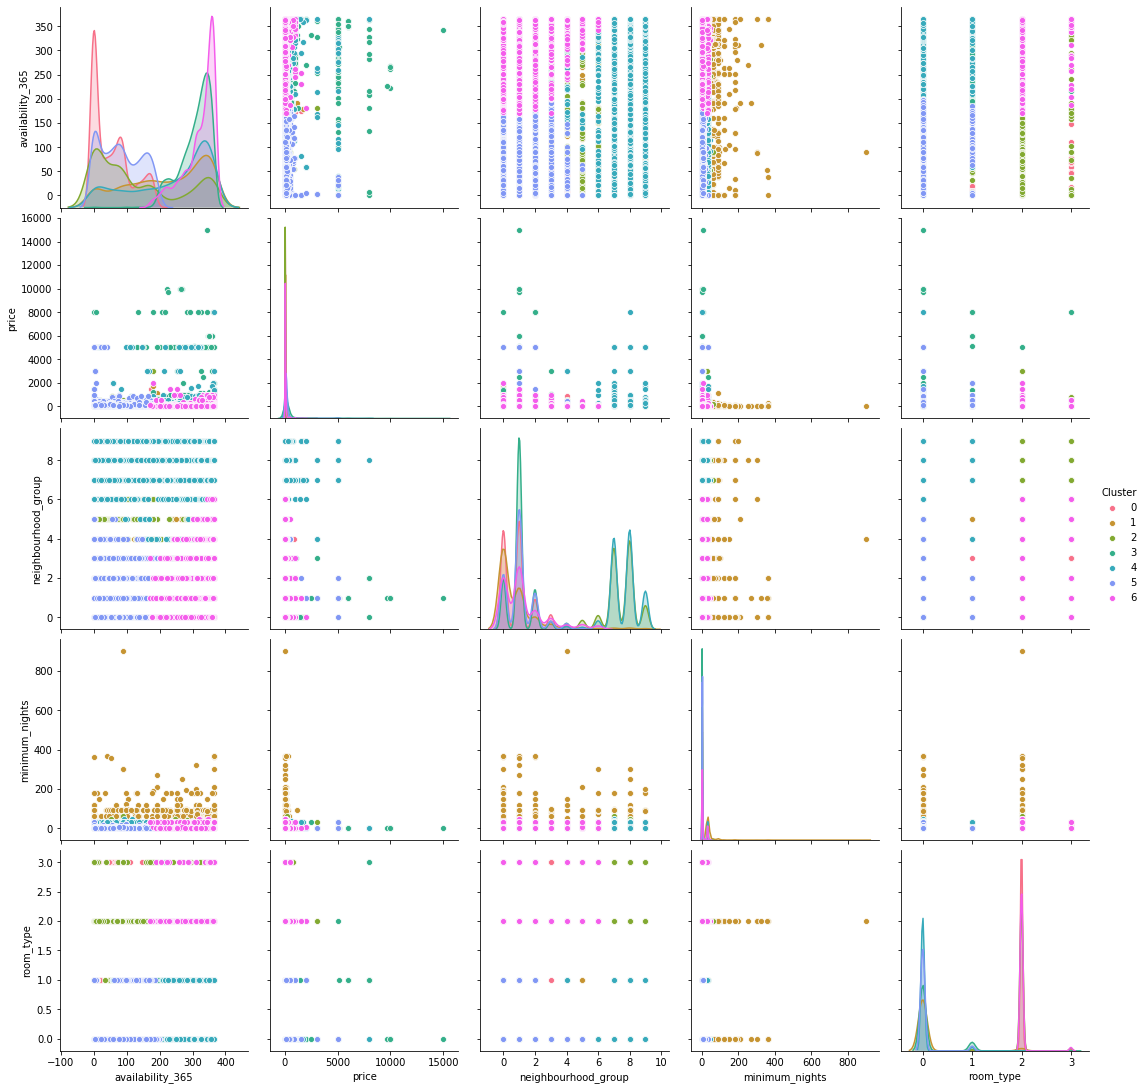

In [44]:
sns.pairplot(data= features_class, hue="Cluster", palette="husl", height=3)

### Spectral Clustering

In [45]:
spectral_labels = cluster.SpectralClustering(n_clusters=6).fit_predict(X_normalized)

In [46]:
features_spectral = pd.DataFrame()
features_spectral['availability_365']  = features_class.availability_365
features_spectral['price'] = features_class.price
features_spectral['neighbourhood_group'] = features_class.neighbourhood_group
features_spectral['minimum_nights'] = features_class.minimum_nights
features_spectral['neighbourhood_group'] = features_class.neighbourhood_group
features_spectral['room_type'] = features_class.room_type
features_spectral['Cluster'] = spectral_labels

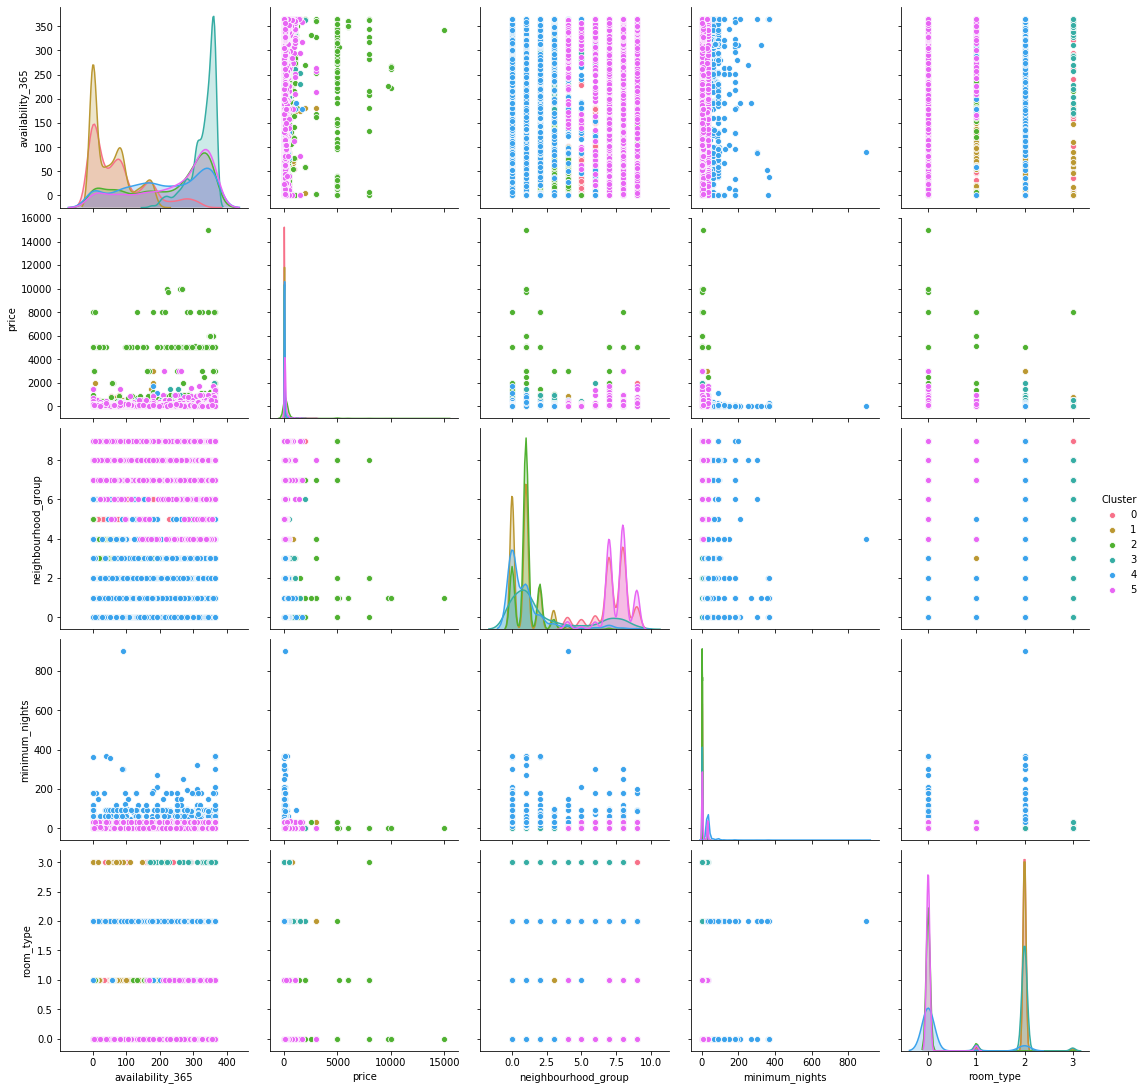

In [47]:
sns.pairplot(data= features_spectral, hue="Cluster", palette="husl", height=3)

By clustering we can see several things:

    1) Expensive Prices are only in one group, which is Cluster number 3. When we check the room types for this Cluster, we see that the majority of them are rooms 0, 1 or 2. (Check which type). Room type 3 is only found in Neighbourhood 9 (Sarrià-Sant Gervasi)
    
    2) Clusters are clearly divided by Neighbourhood group , Availability function and room type.
    We can check this by seeing the kernel density function.
    
    3) Another cluster is made by the highest values of minimum nights. But is a cluster different than the price, and the apartments that have a highest number of minimum nights, are the ones cheapest. 
    This is as expected, since apartments that you can rent only for one night, usually are more expensive.
    
    We can see clear differences in the neighbourhood groups. The cluster number 3, is defined within neighbourhoods 0, 1, 2 which correspond to: Ciutat Vella, Eixample and Gracia. These correspond to the Center of Barcelona, and therefore, due to tourism are the most expensive zones. 
    
    